# Medical Students Health Analysis

## About the Dataset
This project utilizes a dataset sourced from [Kaggle](https://www.kaggle.com/), containing information about medical students and their health activities. The dataset includes variables such as age, weight, smoking habits, diabetes status, and other health-related factors.

## Project Objectives
The aim of this project is to analyze the health activities and patterns of medical students. Key questions addressed include:
1. **What is the age distribution of medical students?**
2. **How many students in the dataset are smokers?**
3. **How many students have been diagnosed with diabetes?**
4. **What is the relationship between age and weight?**

**LIBRARIES**:

- Library **pandas**: to handle data in tabular representation.


## Functionalities and Techniques
This project involves the following:
### Data Preprocessing
- Cleaning missing or invalid entries.
- Converting categorical data into numerical formats for analysis.

### Exploratory Data Analysis (EDA)
- Descriptive statistics to summarize the data.
- Visualizations to understand trends, distributions, and correlations.

### Functions Used
1. **`pandas.read_csv()`**  
   - To load the dataset into a pandas DataFrame.

2. **`pandas.DataFrame.describe()`**  
   - Provides a summary of statistics like mean, median, and quartiles.

3. **`pandas.DataFrame.groupby()`**  
   - For aggregating data based on certain columns (e.g., counting smokers).

4. **`pandas.DataFrame.plot()`**  
   - To create visualizations such as bar charts, scatter plots, and histograms.

5. **Correlation Analysis**
   - Evaluates the relationship between numerical variables (e.g., age and weight).




# 1. Libraries Import and Data Discription
In this phase we will import necessary libraries and load the dataset

## 1.1 Import

In [107]:
import pandas as pd


## 1.2 Retrieve the dataset

In [108]:
data = pd.read_csv("medical.csv")
df=pd.DataFrame(data)
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,4995.0,22.0,Female,195.079777,60.281250,A,15.840094,98.686594,75.0,118.0,194.0,No,NaN
1,4996.0,27.0,Male,174.863528,54.670170,A,17.879359,98.096490,76.0,119.0,NaN,Yes,No
2,4997.0,26.0,Male,164.934305,68.828826,AB,25.301623,98.498367,61.0,139.0,239.0,Yes,No
3,4998.0,31.0,Female,184.304515,42.961291,AB,12.647520,97.903671,81.0,100.0,203.0,NaN,NaN
4,4999.0,26.0,Female,171.308846,44.493067,AB,15.161172,97.901052,91.0,107.0,143.0,No,No


## 1.3 Data Types

In [109]:
print("\nData Info:") 
df.info() 


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      1366 non-null   float64
 1   Age             1352 non-null   float64
 2   Gender          1369 non-null   object 
 3   Height          1333 non-null   float64
 4   Weight          1347 non-null   float64
 5   Blood Type      1366 non-null   object 
 6   BMI             1337 non-null   float64
 7   Temperature     1343 non-null   float64
 8   Heart Rate      1357 non-null   float64
 9   Blood Pressure  1361 non-null   float64
 10  Cholesterol     1348 non-null   float64
 11  Diabetes        1353 non-null   object 
 12  Smoking         1334 non-null   object 
dtypes: float64(9), object(4)
memory usage: 152.8+ KB


In [110]:
print("\nData Description:")    
df.describe()  


Data Description:


,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,1366.000000,1352.000000,1333.000000,1347.000000,1337.000000,1343.000000,1357.000000,1361.000000,1348.000000
mean,5746.933382,26.165680,174.758619,70.024115,23.360060,98.596450,79.540162,114.753123,185.014095
std,433.407187,4.832416,14.277427,17.385564,7.038193,0.518333,11.539181,14.192558,37.321222
min,4995.000000,18.000000,150.045121,40.008471,10.261761,96.910729,60.000000,90.000000,120.000000
25%,5375.250000,22.000000,162.376575,55.081985,17.960549,98.231268,70.000000,103.000000,153.000000
50%,5749.500000,26.000000,174.673665,69.796709,22.672867,98.617989,80.000000,115.000000,185.000000
75%,6123.750000,30.000000,186.722205,85.319387,27.963699,98.957225,90.000000,127.000000,218.000000
max,6497.000000,34.000000,199.989198,99.984648,43.253636,100.083148,99.000000,139.000000,249.000000


In [111]:
print('\nDimentions of Data')
df.shape


Dimentions of Data


(1503, 13)

# 2. Data Preprocessing and Cleaning 

## 2.1  Standardizing Column Names
Ensuring all column names are uniform, descriptive, and consistent with best practices.

In [112]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [113]:
cl = ["Age","Gender","BMI","Smoking","Diabetes"]
df = df[cl]
df.head()


,Age,Gender,BMI,Smoking,Diabetes
0,22.0,Female,15.840094,NaN,No
1,27.0,Male,17.879359,No,Yes
2,26.0,Male,25.301623,No,Yes
3,31.0,Female,12.647520,NaN,NaN
4,26.0,Female,15.161172,No,No


In [114]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'Diabetes'], dtype='object')

## 2.2 Handling Missing Values
Identify, analyze, and address missing or incomplete data to ensure consistency and reliability.

### 2.1 Removing Duplicates

In [115]:
df = df.drop_duplicates()

### 2.2 Finding Duplicate Values

In [116]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicates.sum()

0

### 2.3 Check for Missing Values

In [117]:
# Before dropping
print("Original rows:", len(df))
print("Null in Gender:", df['Gender'].isnull().sum())

# After dropping
df.dropna(subset=['Gender'], inplace=True)
print("Rows after drop:", len(df))

Original rows: 1427
Null in Gender: 130
Rows after drop: 1297


In [118]:
df.isnull().sum()

Age         133
Gender        0
BMI          79
Smoking     154
Diabetes    140
dtype: int64

### 2.4 Filling Missing Values
### Used appropriate defaults for missing values:
- Age: Filled with median.
- Gender: Defaulted to "Female."
- BMI: Filled with median.
- Smoking: Defaulted to "No."
- Diabetes: Defaulted to "No."

In [119]:
df.dropna(subset=['Gender'], inplace=True)

In [120]:
df["Gender"].value_counts()

Gender
Female    663
Male      634
Name: count, dtype: int64

In [121]:
# 1. Fill missing values with appropriate defaults
df["Age"].fillna(df["Age"].median(), inplace=True)
# Drop gender null values
df["BMI"].fillna(df["BMI"].median(), inplace=True)
df["Smoking"] = df["Smoking"].fillna(df["Smoking"].mode()[0])
df["Diabetes"] = df["Diabetes"].fillna(df["Diabetes"].mode()[0])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\4235496131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\4235496131.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [122]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Smoking     0
Diabetes    0
dtype: int64

In [78]:
df.dropna()  # Drops rows with any missing value


,Age,Gender,BMI,Smoking,Diabetes
0,22.0,Female,15.840094,No,No
1,27.0,Male,17.879359,No,Yes
2,26.0,Male,25.301623,No,Yes
3,31.0,Female,12.647520,No,No
4,26.0,Female,15.161172,No,No
...,...,...,...,...,...
1495,33.0,Male,22.012068,No,No
1497,30.0,Female,24.137684,No,No
1500,33.0,Female,17.308414,No,No
1501,32.0,Male,22.546954,No,No


In [79]:
df.isna().sum().sum()

0

In [80]:
df.head()

,Age,Gender,BMI,Smoking,Diabetes
0,22.0,Female,15.840094,No,No
1,27.0,Male,17.879359,No,Yes
2,26.0,Male,25.301623,No,Yes
3,31.0,Female,12.647520,No,No
4,26.0,Female,15.161172,No,No


In [81]:
all = df.describe(include="all")
all

,Age,Gender,BMI,Smoking,Diabetes
count,1297.000000,1297,1297.000000,1297,1297
unique,NaN,2,NaN,2,2
top,NaN,Female,NaN,No,No
freq,NaN,663,NaN,1055,1167
mean,26.206631,NaN,23.283805,NaN,NaN
std,4.521606,NaN,6.879367,NaN,NaN
min,18.000000,NaN,10.261761,NaN,NaN
25%,23.000000,NaN,18.182717,NaN,NaN
50%,26.000000,NaN,22.546954,NaN,NaN
75%,30.000000,NaN,27.519858,NaN,NaN


## 3 Creating Age Groups for Analysis

### Defined bins and labels for age ranges.

- Bins: [0, 18, 25, 30, 34]
- Labels: ["0-18 Years", "19-25 Years", "26-30 Years", "31-34 Years"]
- Created the new "Age Group" column.

In [82]:
df["Age"].max()

34.0

In [123]:
# Define the bins and corresponding labels for age groups
age_bin_edges = [0, 18, 25, 30, 34]  # Age ranges for grouping
age_bin_labels = ["0-18 Years", "19-25 Years", "26-30 Years", "31-34 Years"]

# Create a new column 'Age Group' using pd.cut
df["Age Group"] = pd.cut(df["Age"], bins=age_bin_edges, labels=age_bin_labels)

# Display the updated DataFrame
df.head()


,Age,Gender,BMI,Smoking,Diabetes,Age Group
0,22.0,Female,15.840094,No,No,19-25 Years
1,27.0,Male,17.879359,No,Yes,26-30 Years
2,26.0,Male,25.301623,No,Yes,26-30 Years
3,31.0,Female,12.647520,No,No,31-34 Years
4,26.0,Female,15.161172,No,No,26-30 Years


In [84]:
age_group = df['Age Group'].value_counts().sort_index()
age_group

Age Group
0-18 Years      54
19-25 Years    458
26-30 Years    497
31-34 Years    288
Name: count, dtype: int64

## 1. Age Group Distribution
### Purpose:
Analyze the number of students in each age group.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\203074872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack()


Gender       Female  Male
Age Group                
0-18 Years       25    29
19-25 Years     244   214
26-30 Years     250   247
31-34 Years     144   144


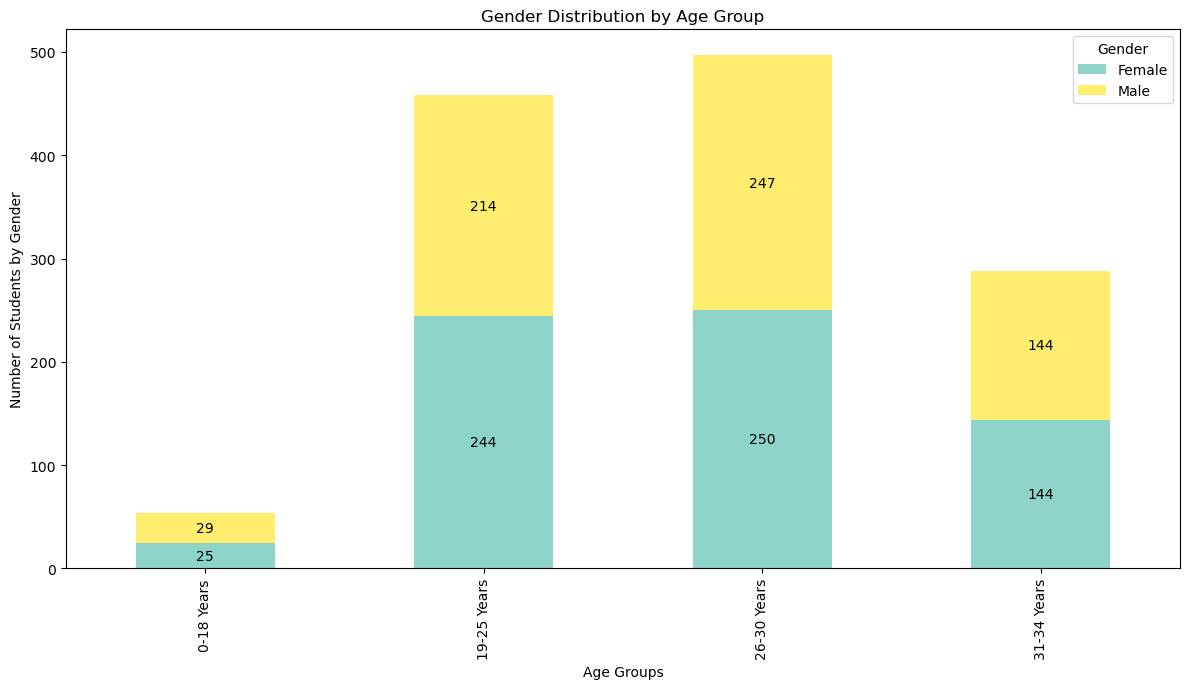

In [126]:
# Grouping data based on 'Gender' and 'Age Group'
age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack()
print(age_gender_counts)

ax = age_gender_counts.plot(
    kind='bar',
    colormap='Set3',
    stacked= True,
    title='Gender Distribution by Age Group',  # Updated title
    ylabel='Number of Students by Gender',    # Updated y-axis label
    xlabel='Age Groups',                      # x-axis label
    figsize=(12, 7)
)

# Adding numbers (counts) on the bars
for container in ax.containers:
    # Add labels to each bar
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=10, color='black')

# Adjust layout
ax.figure.tight_layout()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\3553661099.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bmi_counts = df.groupby([ 'BMI Category', 'Gender']).size().unstack().fillna(0)


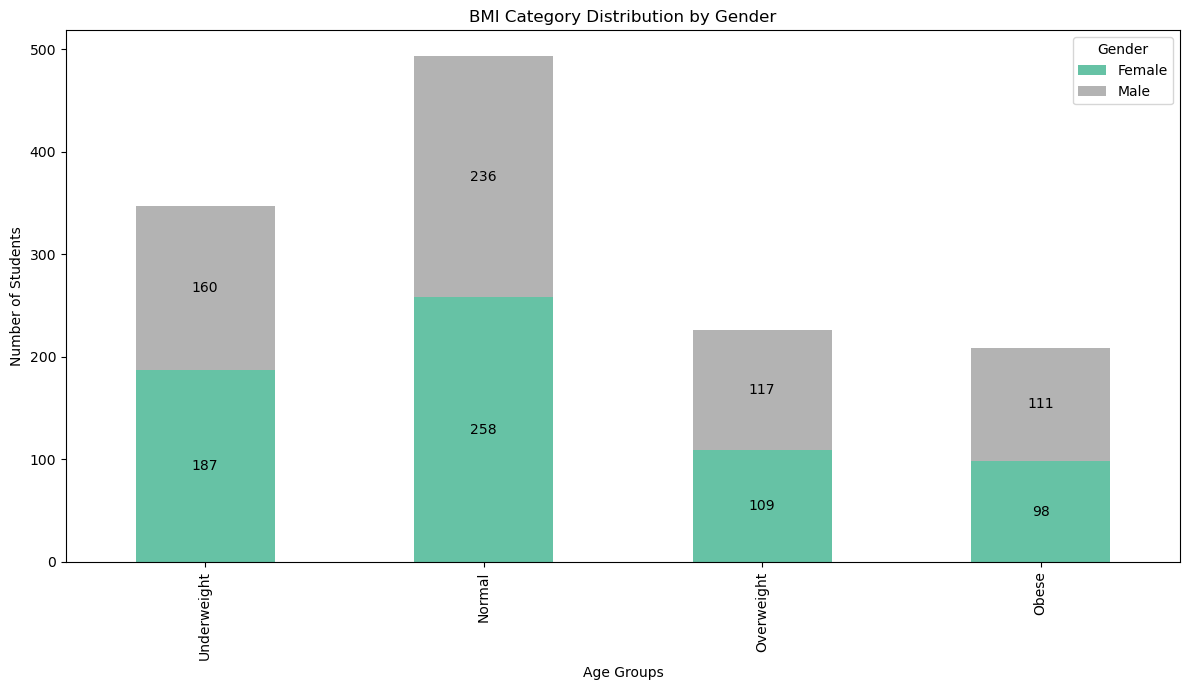

In [99]:
bmi_bins = [0, 18.5, 24.9, 29.9, 40]  # Bins for BMI categories
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
df['BMI Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Grouping data based on 'Age Group' and 'BMI Category'
age_bmi_counts = df.groupby([ 'BMI Category', 'Gender']).size().unstack().fillna(0)

# Plotting the data
ax = age_bmi_counts.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',  # A modern and visually distinct color map
    title='BMI Category Distribution by Gender',  # Updated title
    ylabel='Number of Students',  # Updated y-axis label
    xlabel='Age Groups',  # Updated x-axis label
    figsize=(12, 7),  # Adjusted size for better presentation
)
for container in ax.containers:
    # Add labels to each bar
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=10, color='black')

# Display the plot
ax.figure.tight_layout()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\732683028.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoking_counts = df.groupby(['Age Group', 'Smoking']).size().unstack().fillna(0)


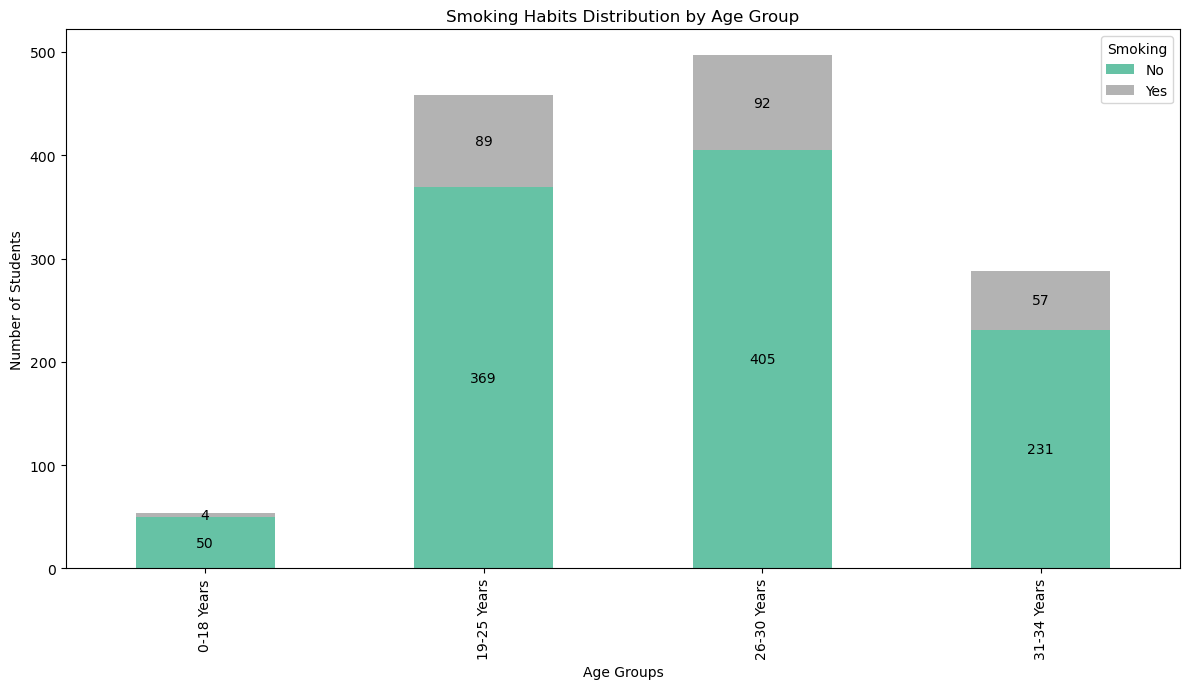

In [127]:
# Grouping data based on 'Age Group' and 'Smoking' status
age_smoking_counts = df.groupby(['Age Group', 'Smoking']).size().unstack().fillna(0)

# Plotting the data
ax = age_smoking_counts.plot(
    kind='bar',
    stacked=True,
    colormap='Set2',
    title='Smoking Habits Distribution by Age Group',
    ylabel='Number of Students',
    xlabel='Age Groups',
    figsize=(12, 7)
)

# Adding numbers (counts) on the bars
for container in ax.containers:
    # Add labels to each bar
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=10, color='black')

# Display the plot
ax.figure.tight_layout()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18756\2586645244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diabetes_counts = df.groupby(['Age Group', 'Diabetes']).size().unstack().fillna(0)


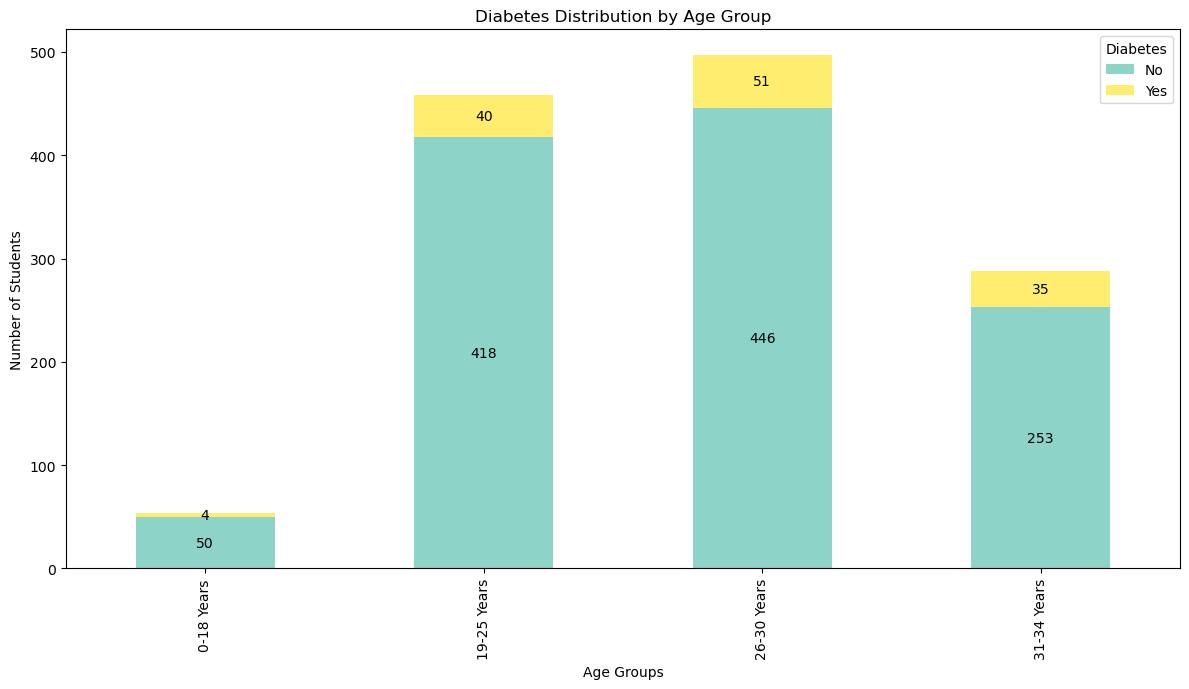

In [89]:
# Grouping data based on 'Age Group' and 'Diabetes' status
age_diabetes_counts = df.groupby(['Age Group', 'Diabetes']).size().unstack().fillna(0)

# Plotting the data
ax = age_diabetes_counts.plot(
    kind='bar',
    stacked=True,
    colormap='Set3',
    title='Diabetes Distribution by Age Group',
    ylabel='Number of Students',
    xlabel='Age Groups',
    figsize=(12, 7)
)

# Adding numbers (counts) on the bars
for container in ax.containers:
    # Add labels to each bar
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=10, color='black')

# Display the plot

ax.figure.tight_layout()